In [1]:
import numpy as np

data= np.load('data.npy')
target= np.load('target.npy')

In [2]:
train_data= data[:1000]
train_target= target[:1000]

test_data= data[1000:]
test_target= target[1000:]

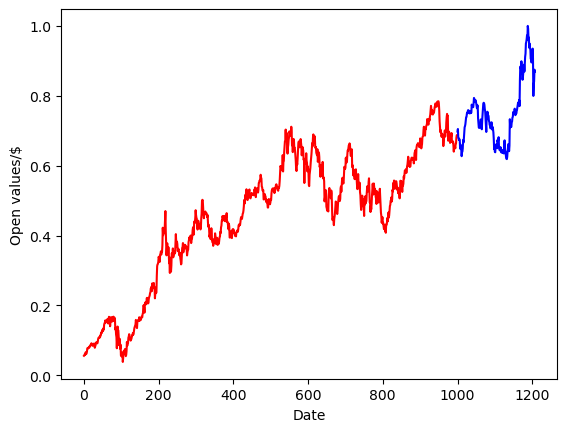

In [3]:
from matplotlib import pyplot as plt

test_x_range= np.arange(1000,1208,1)
#test x range is the array of values between 1000,1208

plt.plot(train_target,'r',label="train")
plt.plot(test_x_range,test_target,'b',label="test")
plt.xlabel('Date')
plt.ylabel('Open values/$')
plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model= Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(50,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')


2024-08-11 21:32:40.415399: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-11 21:32:40.416115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-11 21:32:40.416564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [5]:
history= model.fit(train_data,train_target,epochs=200,validation_split=0.1)

Epoch 1/200


2024-08-11 21:35:34.980203: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-08-11 21:35:35.080341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-11 21:35:35.080907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-11 21:35:35.081404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

28/29 [===========================>..] - ETA: 0s - loss: 0.0290

2024-08-11 21:35:38.522792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-11 21:35:38.523390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-11 21:35:38.523827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 [==============================] - 4s 73ms/step - loss: 0.0289 - val_loss: 0.0117
Epoch 2/200
29/29 [==============================] - 2s 57ms/step - loss: 0.0059 - val_loss: 0.0014
Epoch 3/200
29/29 [==============================] - 2s 58ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 4/200
29/29 [==============================] - 2s 61ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 5/200
29/29 [==============================] - 2s 61ms/step - loss: 0.0039 - val_loss: 0.0068
Epoch 6/200
29/29 [==============================] - 2s 62ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 7/200
29/29 [==============================] - 2s 62ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 8/200
29/29 [==============================] - 2s 62ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 9/200
29/29 [==============================] - 2s 62ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 10/200
29/29 [==============================] - 2s 62ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 11/20

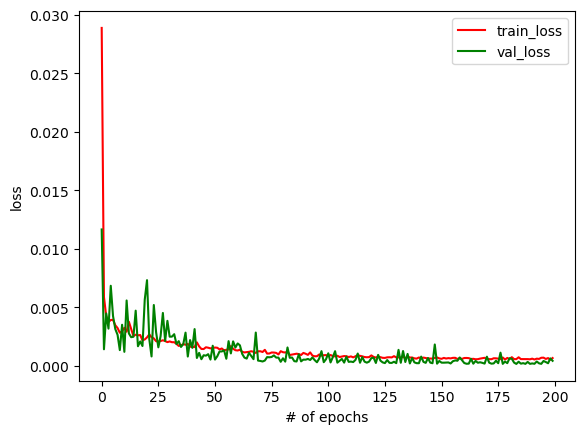

In [6]:
plt.plot(history.history['loss'],'r',label='train_loss')
plt.plot(history.history['val_loss'],'g',label='val_loss')
plt.xlabel('# of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
result= model.predict(test_data)
from sklearn.metrics import r2_score

r2= r2_score(test_target,result)
print('r2 score: ',r2)

7/7 [==============================] - 0s 14ms/step
r2 score:  0.9373957428988102


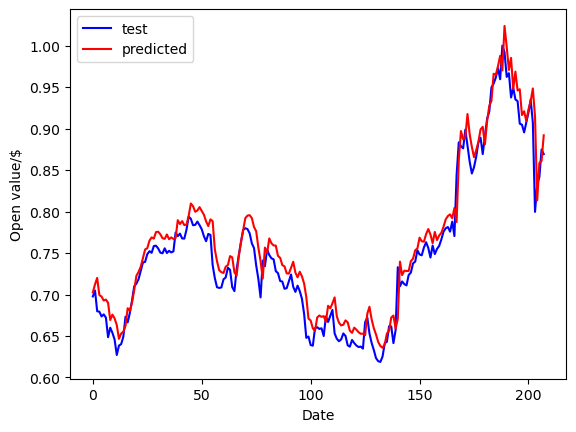

In [13]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open value/$')
plt.legend()
plt.show()